In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('group_data_cleaning.csv')

In [4]:
df

,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",Did you get your first full time job through your NYSC placement?,...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
0,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,No,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
1,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,No,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills
2,Male,2015,Electrical & Electronic Engineering,University of Benin,Bachelor's degree,Working full time (paid employment),2,No,2013.0,No,...,Naira,10.0,Capacity,Social media/professional networking sites,No,Car,No: From my current job,Agree,Agree,"Ability to work with others, Knowledge of the ..."
3,Male,2013,Economics,"Bowen University, Iwo",Higher National Diploma (HND),Working full time (paid employment),4,Yes,2016.0,No,...,Naira,8.0,Don't know,"University/polytechnic (e.g. Careers Service, ...",Yes: during my higher education study,Commercial Vehicles,No: From my current job,Strongly Disagree,Strongly Disagree,"Critical thinking skills, Ability to work with..."
4,Male,2015,Accountancy,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),1,Yes,2017.0,No,...,Naira,11.0,IT/SIWES/Internship experience (gained as part...,Internship,No,Commercial Vehicles,No,Agree,Agree,"Ability to solve complex problems, Knowledge o..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2956,Female,2017,Medicine,"Bowen University, Iwo",Bachelor's degree,Working full time (paid employment),2,No,NaN,I have not completed my NYSC,...,Naira,8.0,The subject(s) I studied,"University/polytechnic (e.g. Careers Service, ...",No,Commercial Vehicles,No,Agree,Agree,"Critical thinking skills, Ability to solve com..."
2957,Male,2016,Geography,"Nasarawa State University, Keffi",Bachelor's degree,Youth Corper (NYSC),5,Ongoing,2018.0,No,...,Naira,12.0,The level of study,Recruitment agency/Online job site,Yes: before my higher education,Commercial Vehicles,No,Agree,Agree,Critical thinking skills
2958,Female,2015,Economics,"Ahmadu Bello University, Zaria",Bachelor's degree,Unemployed,2,Yes,2016.0,No,...,Naira,5.0,The subject(s) I studied,Media (e.g. newspaper/magazine advertisement),No,Commercial Vehicles,No,Agree,Strongly Agree,Critical thinking skills
2959,Female,2014,Physics and Astronomy,University of Lagos,Bachelor's degree,Unemployed,1,Yes,2016.0,No,...,Naira,10.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Strongly Agree,Strongly Agree,"Critical thinking skills, Ability to solve com..."


# DATA CLEANING 

In [5]:
df.dtypes

What is your gender                                                                                                              object
Year of graduation                                                                                                                int64
Title of course studied                                                                                                          object
Polytechnic/University attended                                                                                                  object
What is your highest level of education?                                                                                         object
What best describes your current status?                                                                                         object
How many jobs have you had since graduation including your current one?                                                           int64
Have you completed your NYSC?                   

In [6]:
count_int_dtypes = df.select_dtypes(include=['int64']).shape[1]

In [7]:
count_int_dtypes

2

In [8]:
df.isnull().sum()

What is your gender                                                                                                                0
Year of graduation                                                                                                                 0
Title of course studied                                                                                                            0
Polytechnic/University attended                                                                                                    0
What is your highest level of education?                                                                                           0
What best describes your current status?                                                                                           0
How many jobs have you had since graduation including your current one?                                                            0
Have you completed your NYSC?                                        

In [9]:
df['If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?'].unique()

array([  nan, 2016., 2013., 2017., 2018., 2015., 2014., 2019.])

In [10]:
# Define the conditions for replacement
mask = (df['Have you completed your NYSC?'] == 'No') & df['If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?'].isna()

# Replace "nan" values with "N/A" in the specified condition
df.loc[mask, 'If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?'] = 'N/A'

The code above is to replace all NaN values in the second column that correspond only to the unique value - "No" in the first column with "N/A". This code in turn leaves other unique values in the second column unchanged

In [11]:
df['If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?'] = df['If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?'].fillna('Not Completed')

In [12]:
df['If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?'].unique()

array(['Not Completed', 2016.0, 2013.0, 2017.0, 2018.0, 'N/A', 2015.0,
       2014.0, 2019.0], dtype=object)

In [13]:
selected_cols = [
    'Thinking about your first employment after graduation, what was your job level?',
    'What is/was your job role?',
    'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)',
    'Still thinking about your first employment, what is/was your monthly income level?',
    'Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?',
    'What was the most significant reason for deciding to take your first job?'
]

df[selected_cols] = df[selected_cols].fillna('N/A')

In [17]:
df['Which employer in the country do you think offers the best opportunities for graduates?'] = df['Which employer in the country do you think offers the best opportunities for graduates?'].fillna('N/A')

In [19]:
df['Reason why?'] = df['Reason why?'].fillna('None')

In [20]:
df.isnull().sum()

What is your gender                                                                                                             0
Year of graduation                                                                                                              0
Title of course studied                                                                                                         0
Polytechnic/University attended                                                                                                 0
What is your highest level of education?                                                                                        0
What best describes your current status?                                                                                        0
How many jobs have you had since graduation including your current one?                                                         0
Have you completed your NYSC?                                                             

In [21]:
df.describe()

,Year of graduation,How many jobs have you had since graduation including your current one?,Approximately how many hours a day do you currently work?
count,2961.000000,2961.000000,2961.000000
mean,2015.109085,1.812226,9.025329
std,1.325652,0.991790,2.660878
min,2013.000000,1.000000,0.000000
25%,2014.000000,1.000000,8.000000
50%,2015.000000,2.000000,9.000000
75%,2016.000000,2.000000,10.000000
max,2017.000000,10.000000,24.000000


In [22]:
# Exploring Employment Status
employment_status_distribution = df['What best describes your current status?'].value_counts()
employment_status_distribution

Working full time (paid employment)                                                           1191
Youth Corper (NYSC)                                                                            459
Self-employed/freelance/entrepreneur                                                           364
Unemployed                                                                                     359
Voluntary or other unpaid work or on an internship                                             294
Due to start a job in the next month/developing a professional portfolio/creative practice      80
Engaged in full-time further study, training or research                                        73
Taking time out to prepare for further studies, GMAT, professional exams                        64
Engaged in part-time further study, training or research                                        39
Doing something else (e.g. looking after home or family)                                        38
Name: What

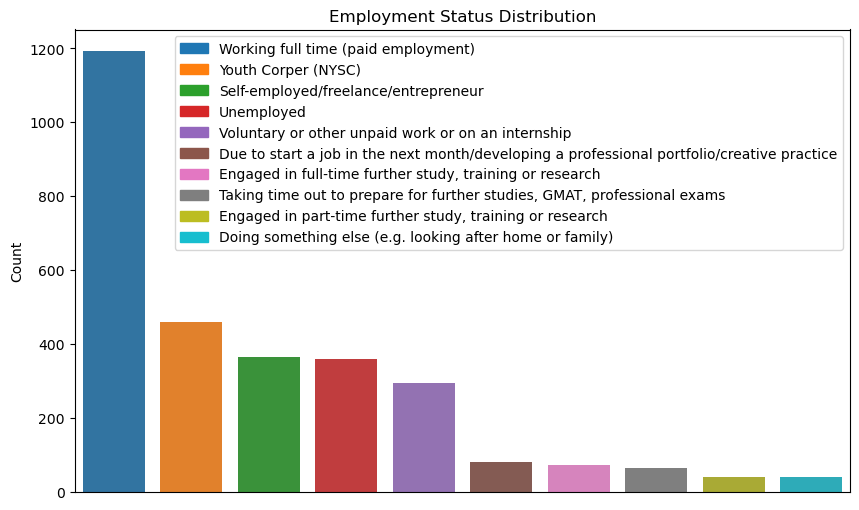

In [29]:
employment_status_distribution = {
    'Working full time (paid employment)': 1191,
    'Youth Corper (NYSC)': 459,
    'Self-employed/freelance/entrepreneur': 364,
    'Unemployed': 359,
    'Voluntary or other unpaid work or on an internship': 294,
    'Due to start a job in the next month/developing a professional portfolio/creative practice': 80,
    'Engaged in full-time further study, training or research': 73,
    'Taking time out to prepare for further studies, GMAT, professional exams': 64,
    'Engaged in part-time further study, training or research': 39,
    'Doing something else (e.g. looking after home or family)': 38
}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(employment_status_distribution.keys()), y=list(employment_status_distribution.values()))
plt.title('Employment Status Distribution')
plt.ylabel('Count')
plt.xticks([], [])
handles = [plt.Rectangle((0, 0), 1, 1, color='C{}'.format(i)) for i in range(len(employment_status_distribution))]
plt.legend(handles, employment_status_distribution.keys(), loc='best')
plt.show()

In [24]:
# Impact of Education on Job Status
education_employment = df.groupby(['What is your highest level of education?', 'What best describes your current status?']).size().unstack()
education_employment

What best describes your current status?,Doing something else (e.g. looking after home or family),Due to start a job in the next month/developing a professional portfolio/creative practice,"Engaged in full-time further study, training or research","Engaged in part-time further study, training or research",Self-employed/freelance/entrepreneur,"Taking time out to prepare for further studies, GMAT, professional exams",Unemployed,Voluntary or other unpaid work or on an internship,Working full time (paid employment),Youth Corper (NYSC)
What is your highest level of education?,,,,,,,,,,
Bachelor's degree,28.0,66.0,48.0,27.0,273.0,59.0,289.0,259.0,1002.0,428.0
Higher National Diploma (HND),5.0,4.0,1.0,1.0,41.0,1.0,36.0,10.0,59.0,30.0
MBA degree,1.0,NaN,1.0,NaN,4.0,NaN,1.0,NaN,10.0,NaN
Master's degree,4.0,6.0,20.0,7.0,33.0,2.0,25.0,13.0,107.0,1.0
Ordinary National Diploma (OND),NaN,4.0,3.0,4.0,11.0,1.0,8.0,11.0,11.0,NaN
PhDs/Doctorate Degree,NaN,NaN,NaN,NaN,2.0,1.0,NaN,1.0,2.0,NaN


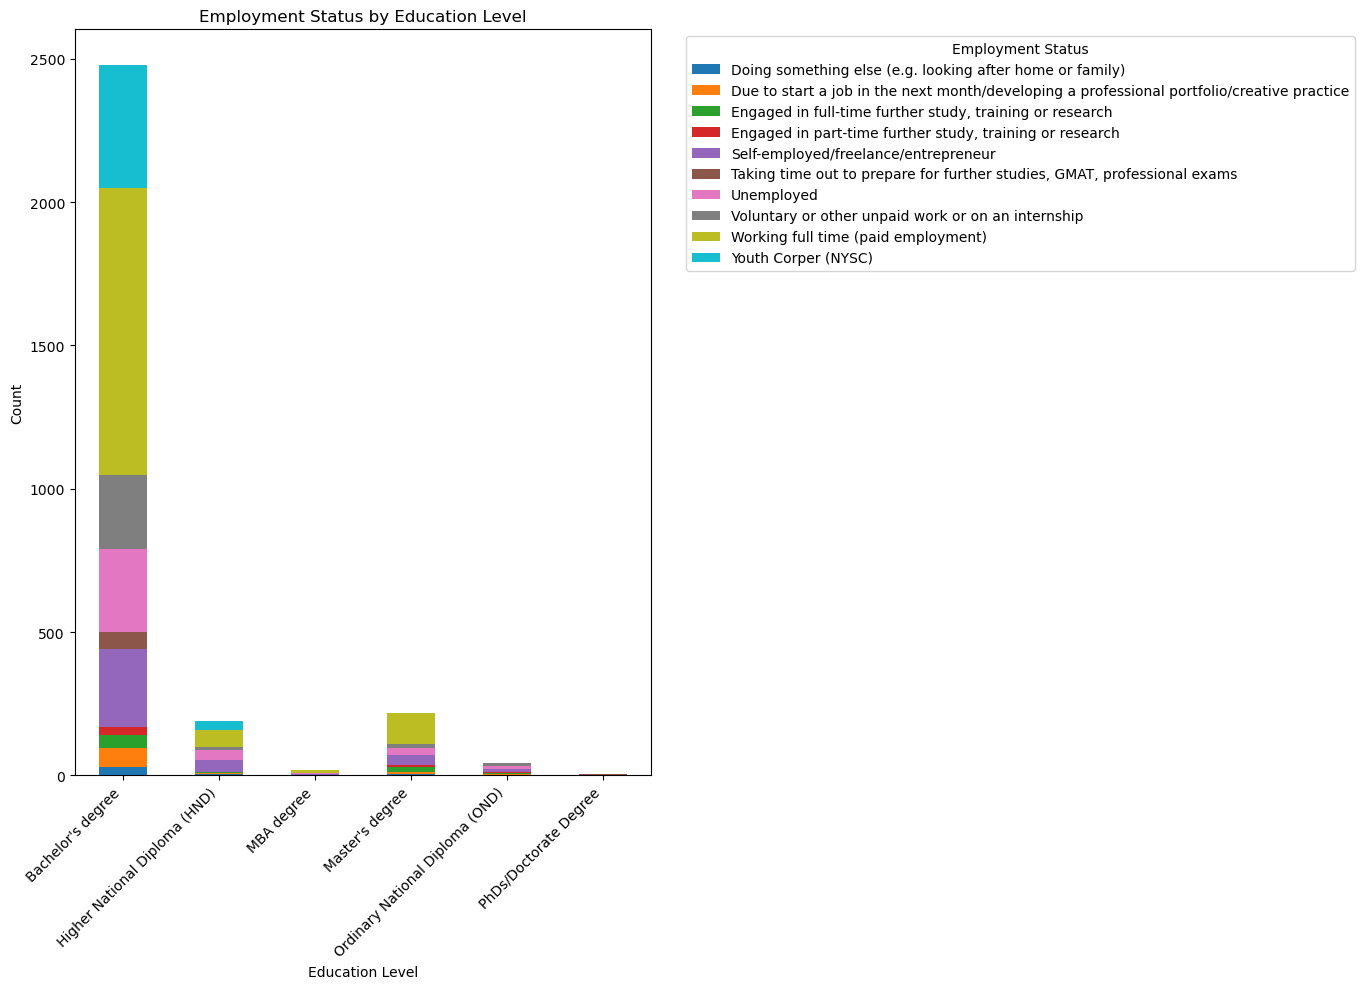

In [38]:
education_employment_data = {
    "Education Level": ["Bachelor's degree", "Higher National Diploma (HND)", "MBA degree", "Master's degree", "Ordinary National Diploma (OND)", "PhDs/Doctorate Degree"],
    "Doing something else (e.g. looking after home or family)": [28.0, 5.0, 1.0, 4.0, None, None],
    "Due to start a job in the next month/developing a professional portfolio/creative practice": [66.0, 4.0, None, 6.0, 4.0, None],
    "Engaged in full-time further study, training or research": [48.0, 1.0, 1.0, 20.0, 3.0, None],
    "Engaged in part-time further study, training or research": [27.0, 1.0, None, 7.0, 4.0, None],
    "Self-employed/freelance/entrepreneur": [273.0, 41.0, 4.0, 33.0, 11.0, 2.0],
    "Taking time out to prepare for further studies, GMAT, professional exams": [59.0, 1.0, None, 2.0, 1.0, 1.0],
    "Unemployed": [289.0, 36.0, 1.0, 25.0, 8.0, None],
    "Voluntary or other unpaid work or on an internship": [259.0, 10.0, None, 13.0, 11.0, 1.0],
    "Working full time (paid employment)": [1002.0, 59.0, 10.0, 107.0, None, 2.0],
    "Youth Corper (NYSC)": [428.0, 30.0, None, 1.0, None, None]
}
df1 = pd.DataFrame(education_employment_data)
df1.set_index('Education Level').plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# OBSERVATIONS


### Education Levels and Employment Status:

1. **Bachelor's Degree and Employment:** The highest count in employment status is "Working full time (paid employment)" for individuals with a Bachelor's degree. It's indicative that a significant number of individuals with a Bachelor's degree are engaged in paid employment.

2. **Self-Employment among HND Holders:** A noticeable count of individuals with Higher National Diploma (HND) is self-employed or working as freelancers/entrepreneurs, which could suggest a tendency toward entrepreneurial ventures among this group.

3. **MBA and Voluntary Work/Internship:** Individuals with an MBA degree have a considerable count in "Voluntary or other unpaid work or on an internship," which might indicate a choice for gaining practical experience or skill development through unpaid work before securing paid employment.

4. **Master's Degree and Employed in Full-time Study/Research:** There's a significant count of individuals with a Master's degree engaged in full-time further study, training, or research, indicating a pursuit of advanced education or research at a significant rate among this group.

5. **NaN Values and Missing Data:** There are several missing entries (NaN) across different education levels, suggesting incomplete or unavailable data for certain education and employment status categories.

### Lower Education Levels and Fewer Advanced Employment Categories:

- The counts reduce or are less represented as the education level decreases, especially in more advanced employment categories like full-time paid employment, suggesting a trend where individuals with higher education levels secure more advanced job roles.

### Patterns of Unemployment:

- There are counts of "Unemployed" individuals across all education levels, indicating that unemployment is present across various educational backgrounds, not exclusive to a specific education level.

### Insights:

- **Education Level and Job Attainment:** There's a visible relationship between education level and job attainment. Higher education levels often correspond to more advanced employment categories, like paid employment and research roles.

In [17]:
# Completing NYSC and Employment
nysc_employment = data.groupby(['Have you completed your NYSC?', 'What best describes your current status?']).size().unstack()
nysc_employment

What best describes your current status?,Doing something else (e.g. looking after home or family),Due to start a job in the next month/developing a professional portfolio/creative practice,"Engaged in full-time further study, training or research","Engaged in part-time further study, training or research",Self-employed/freelance/entrepreneur,"Taking time out to prepare for further studies, GMAT, professional exams",Unemployed,Voluntary or other unpaid work or on an internship,Working full time (paid employment),Youth Corper (NYSC)
Have you completed your NYSC?,,,,,,,,,,
No,9.0,17.0,7.0,9.0,74.0,12.0,51.0,101.0,113.0,70.0
Ongoing,1.0,5.0,3.0,NaN,22.0,3.0,2.0,16.0,25.0,381.0
Yes,28.0,58.0,63.0,30.0,268.0,49.0,306.0,177.0,1053.0,8.0


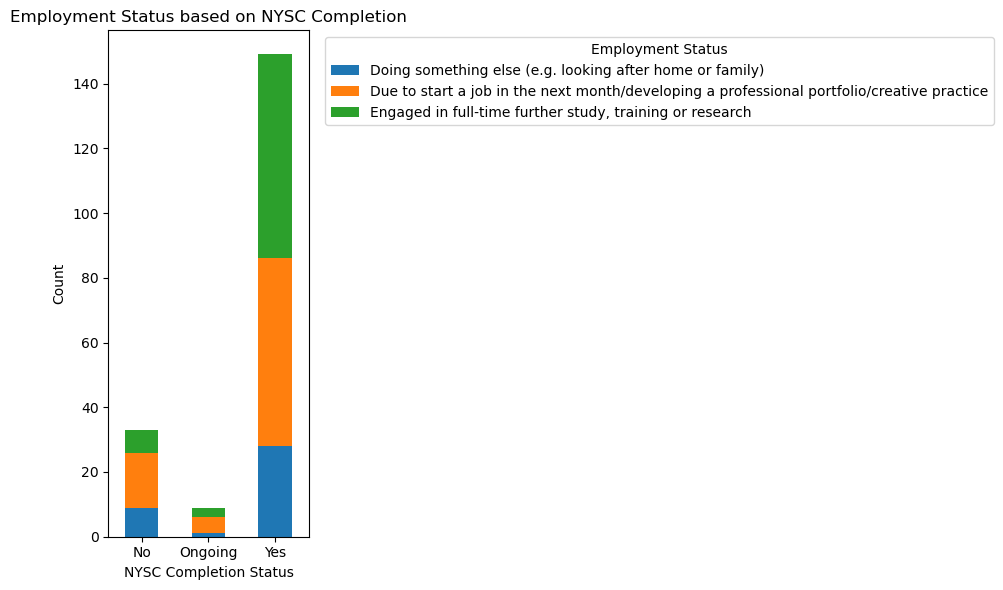

In [40]:
nysc_employment_data = {
    'Have you completed your NYSC?': ['No', 'Ongoing', 'Yes'],
    'Doing something else (e.g. looking after home or family)': [9.0, 1.0, 28.0],
    'Due to start a job in the next month/developing a professional portfolio/creative practice': [17.0, 5.0, 58.0],
    'Engaged in full-time further study, training or research': [7.0, 3.0, 63.0],
}
df2 = pd.DataFrame(nysc_employment_data)
df2.set_index('Have you completed your NYSC?', inplace=True)
ax = df2.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Employment Status based on NYSC Completion')
plt.xlabel('NYSC Completion Status')
plt.ylabel('Count')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# OBSERVATION
Certainly! The provided table represents the counts of different employment statuses based on whether individuals have completed the National Youth Service Corps (NYSC) in Nigeria. Here are patterns and insights that could be derived from this data in relation to your project topic:

### Employment Status based on NYSC Completion:

1. **Higher Count in "Working full time" for Completed NYSC Individuals:** There's a notably higher count of individuals who have completed their NYSC engaged in "Working full time (paid employment)," indicating a trend where completing NYSC might have a correlation with obtaining full-time paid employment.

2. **Significant "Unemployed" Count for Non-Participants or Ongoing NYSC:** Non-participants or ongoing participants in NYSC show a substantial count in the "Unemployed" category, suggesting a potential challenge in securing employment immediately without completing or during the service.

3. **Self-Employment:** Participants who have completed NYSC show a considerable count in self-employment or entrepreneurial roles, possibly indicating a tendency towards starting their own ventures after completing the service.

4. **Further Studies and Training:** Individuals involved in "Engaged in full-time further study, training, or research" seem to be more prevalent among those who have completed NYSC, suggesting a pursuit of advanced education or skill development after the service.

### Insights:

- **Job Readiness Post-NYSC:** Completion of NYSC might contribute to a higher likelihood of acquiring full-time paid jobs, while ongoing or non-participation could potentially correlate with unemployment or a delay in job acquisition.

- **Entrepreneurship Opportunities:** There seems to be an inclination toward entrepreneurship or self-employment among individuals who have completed the NYSC.

Understanding these patterns provides insights into the impact of completing or not completing the NYSC on the employment landscape and shed light on how the service correlates with different job statuses among the surveyed individuals

In [48]:
# Identify Correlations
correlation_matrix = df.corr()
correlation_matrix

,Doing something else (e.g. looking after home or family),Due to start a job in the next month/developing a professional portfolio/creative practice,"Engaged in full-time further study, training or research"
Doing something else (e.g. looking after home or family),1.000000,0.997191,0.972995
Due to start a job in the next month/developing a professional portfolio/creative practice,0.997191,1.000000,0.987551
"Engaged in full-time further study, training or research",0.972995,0.987551,1.000000
